# CS 109A/AC 209A/STAT 121A Data Science: Homework 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 21st, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**


Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [69]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
print 'done'

done


---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Mieling, Isabelle

### Part (b): Course Number

AC 209a

### Part (c): Who did you work with?

---

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y. 


### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

In [70]:
def split(data, m) :  # splits data frame into test and train dataset
    length = data.shape[0] # get number of rows in dataframe
    row_list = range(length)
    np.random.shuffle(row_list)
    train_rows = row_list[0:int(length * (m/100))]
    train = data.iloc[train_rows, :]
    test_rows = row_list[int(length * (m/100)):]
    test = data.iloc[test_rows, :]
    return train, test

def knn_predict(k, train, test):  # train - n x 2, test - n x 1
    # return n x 2 df, 1st column is test, 2nd is predicte values
    predictions = []
    for index, test_row in test.iterrows(): # for each test point, store distances between test * training points
        distances = (abs(train['x'] - test_row['x']))
        distances_ordered = distances.sort_values(ascending=True)
        knn_index = distances_ordered.index # this gives indices of training points closest to test
        knn = knn_index[:k] # take only the k nearest
        predictions.append(np.mean(train.ix[knn]['y'])) # avg values of k neighbors, add to list
        # .ix label-location based indexer with integer position feedback
    test_copy = test.copy()
    test_copy['predictions'] = predictions
    return test_copy
    
def linear_reg_fit(train): # train - n x 2, returns coef of linear reg model
    # return float slope, float intercept 
    # use linear regression to predict fit for dataset 
    X = train['x']
    Y = train['y']
    beta1 = np.sum((X - np.mean(X)) * (Y-np.mean(Y))) / np.sum((X-np.mean(X))**2)
    beta0 = np.mean(Y) - beta1*np.mean(X)
    return beta0, beta1

def linear_reg_predict(test, b0, b1): # test is n x 1 and return n x 2 with the predicted y values given coefs
    test_copy = test.copy()
    predictions = []
    for index, test_row in test.iterrows():
        why = b0 + (test_row['x'])*b1
        predictions.append(why)
    test_copy['predictions'] = predictions
    return test_copy

def score(predicted, actual): # n x 2 for both
    # return R^2 coefficient for predicted values
    rss = sum((actual['y'] - predicted['predictions'])**2)
    tss = sum((actual['y'] - np.mean(actual['y']))**2)

    r_sqrd = 1- (rss/tss)
    return r_sqrd

In [71]:
 
arr = pd.Series((14, 23, 1, 6, 3, 433))
arr1 = pd.Series((4, 3, 21, 6, 43, 43))
arr3 = pd.Series((5, 3, 22, 61, 3, 99))
table = pd.DataFrame({'col1' : arr, 'col2' : arr1, 'col3' : arr3})
train = table.sort_values('col1')
print train
print "**" 
for index, train_row in train.iterrows():
    print index + 1

   col1  col2  col3
2     1    21    22
4     3    43     3
3     6     6    61
0    14     4     5
1    23     3     3
5   433    43    99
**
3
5
4
1
2
6


### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

In [28]:
df = pd.read_csv('dataset_1_full.txt')
print df.head()

          x         y
0  0.177418  1.401178
1  0.573076  3.489890
2  0.503775  1.684924
3  0.594027  3.898209
4  0.335754  2.878410


In [103]:
start_time = time.time()
train, test = split(df, 70)

print len(train)
print len(test)
print train.head()
print test.head()

test_copy = test.copy()
tester = pd.DataFrame(test_copy['x']) # take on the x column from the test df and run this into knn
print tester.head()

print 'k = 5'
tester_knn = knn_predict(5, train, tester) 
print tester_knn.head()
  
b0, b1 = linear_reg_fit(train)
print "coefficients of train: " , b0,b1
    
linear_reg_prediction = linear_reg_predict(tester, b0, b1)    
print linear_reg_prediction.head()
    
print 'R^2 : ' , 
print score(linear_reg_prediction, test) 
elapsed_time = time.time() - start_time
print "elapsed time is: " , elapsed_time

350
150
            x         y
264  0.840436  4.040740
229  0.905535  4.553214
263  0.362631  1.550771
334  0.299706  3.425539
269  0.409345  1.493940
            x         y
417  0.800103  4.212261
476  0.192838  2.368375
489  0.760342  3.282187
466  0.423243  1.553945
485  0.487418  3.820174
            x
417  0.800103
476  0.192838
489  0.760342
466  0.423243
485  0.487418
k = 5
            x  predictions
417  0.800103     3.471940
476  0.192838     2.468971
489  0.760342     3.476630
466  0.423243     2.644795
485  0.487418     2.376168
coefficients of train:  1.10054016653 2.78778249664
            x  predictions
417  0.800103     3.331053
476  0.192838     1.638130
489  0.760342     3.220210
466  0.423243     2.280450
485  0.487418     2.459355
R^2 :  0.459161449454
elapsed time is:  0.150809049606


In [100]:
# Use sklearn to evaluate how KNN and linear regression each perform on this dataset.

start_time = time.time()
train70, test30 = sk_split(df, test_size=0.3)
print train70.head()
print test30.head()
print len(train70) , len(test30)

trainx = train70['x'].values.reshape(len(train70['x'].values),1)
trainy = train70['y'].values.reshape(len(train70['y'].values),1)
testx = test30['x'].values.reshape(len(test30['x'].values),1)
testy = test30['y'].values.reshape(len(test30['y'].values),1)

neighbors = KNN(n_neighbors=3)
neighbors.fit(trainx, trainy)
predicted_y = neighbors.predict(testx)
r= neighbors.score(testx, testy)

regression = Lin_Reg()
regression.fit(trainx, trainy)
predicted_y = regression.predict(testx)
r = regression.score(testx, testy)

print r
elapsed_time = time.time() - start_time
print "time elapsed : " , elapsed_time

            x         y
307  0.792907  3.724795
313  0.828151  3.789137
242  0.983623  4.345508
246  0.058459 -0.771188
450  0.504531  3.704618
            x         y
362  0.168910  2.589183
413  0.077640  1.491803
244  0.924547  3.646527
178  0.953612  3.994362
264  0.840436  4.040740
350 150
0.358835069503
time elapsed :  0.0102829933167


The R^2 values are similar! There are some changes we could make to make the implementation faster and more efficient. By combining multipel steps, we could eliminate time for each step. 

## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

** Solution ** 
Predictive models for data like KNN and simple linear regression can be used to fill in missing values in a data set becuase they use existing data to predict the most likely value of the missing data. We assume that there is a general form of how a response variable, Y, relates to one or more predictirs, X. Therefore, we can define the statistical model as any algorithm that attempts to estimate the function that relates the predictors to the response.  Specifically, for KNN, we give training data with predictor values and reponse values as well as testing data with predictor value and response values. For the i-th testing data point with a specific predictor, we kind k data points in the training set whose predictors are the most similar in Euclidean distance to x. 

In [6]:
# train might be a pandas df so first thing to do is to turn it into a numpy array
df = pd.read_csv('dataset_1_missing.txt') 
df = df.head(10)
print df 
def fill_knn(train1, k) : 
    train = train[train['y'].isnull()==0]  
    train = np.array(train)
    train = train[train[:,1].notnull()]
    train = train[train1['y'].notnull()]
    test = train1.isnull((train1['y']==1))
    #train_array = train.as_matrix(columns=None) #Convert the frame to its Numpy-array representation, columns: If None, return all columns, otherwise, returns specified columns.
    #neighbors = KNN(n_neighbors=k)
    #neighbors.fit(x_train, y_train)
    print train
    print '---888'
    print test
    
fill_knn(df, 5)    
    
    
    

SyntaxError: invalid syntax (<ipython-input-6-c1d5f6608fd2>, line 8)

In [ ]:
#--------  fill_knn
#input: missing_df (dataframe), full_df (dataframe), missing_ind (indices of missing values), 
#       filled_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)

def fill_knn(missing_df, full_df, missing_ind, filled_ind, k):
    #preparing data in array form
    x_filled = missing_df.loc[filled_ind, 'x'].values.reshape((len(filled_ind), 1))
    y_filled = missing_df.loc[filled_ind, 'y'].values
    x_missing = missing_df.loc[missing_ind, 'x'].values.reshape((len(missing_ind), 1))
    y_missing = full_df.loc[missing_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_filled, y_filled)
    
    #predict y-values
    predicted_y = neighbours.predict(x_missing)
    
    #score predictions
    r = neighbours.score(x_missing, y_missing)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[missing_ind, 'y'] = pd.Series(predicted_y, index=missing_ind)
    
    return predicted_df, r

#--------  fill_lin_reg
#input: missing_df (dataframe), full_df (dataframe), missing_ind (indices of missing values), 
#       filled_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)


def fill_lin_reg(missing_df, full_df, missing_ind, filled_ind):
    #preparing data in array form
    x_filled = missing_df.loc[filled_ind, 'x'].values.reshape((len(filled_ind), 1))
    y_filled = missing_df.loc[filled_ind, 'y'].values
    x_missing = missing_df.loc[missing_ind, 'x'].values.reshape((len(missing_ind), 1))
    y_missing = full_df.loc[missing_ind, 'y'].values
    
    #fit linear model
    regression = Lin_Reg()
    regression.fit(x_filled, y_filled)
    
    #predict y-values
    predicted_y = regression.predict(x_missing)
    
    #score predictions
    r = regression.score(x_missing, y_missing)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[missing_ind, 'y'] = pd.Series(predicted_y, index=missing_ind)
    
    return predicted_df, r
    

### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``).. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

In [ ]:
**Solution:**



#number of neighbours
k=10

### CODING TIP: You have to generate data for six different datasets, is it a good idea
### to copy and paste the same block of code over and over again for six times? 
### How can you get around this?
### For HW2 it's still ok to copy and paste, for HW3, we will need you to see where functional
### abstraction and iteration are called for and implement them.


#plot predicted points
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))


#Read dataset 1
missing_df = pd.read_csv('./dataset/dataset_1_missing.txt')
full_df = pd.read_csv('./dataset/dataset_1_full.txt')

missing_ind = missing_df[missing_df['y'].isnull()].index
filled_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                missing_ind, 
                                filled_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    missing_ind, 
                                    filled_ind)

ax5, ax6 = plot_missing(ax5, 
                        ax6, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k)


#Read dataset 4
missing_df = pd.read_csv('./dataset/dataset_4_missing.txt')
full_df = pd.read_csv('./dataset/dataset_4_full.txt')

missing_ind = missing_df[missing_df['y'].isnull()].index
filled_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                missing_ind, 
                                filled_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    missing_ind, 
                                    filled_ind)

ax1, ax2 = plot_missing(ax1, 
                        ax2, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k)

#Read dataset 6
missing_df = pd.read_csv('./dataset/dataset_6_missing.txt')
full_df = pd.read_csv('./dataset/dataset_6_full.txt')

missing_ind = missing_df[missing_df['y'].isnull()].index
filled_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, full_df, missing_ind, filled_ind, k)

predicted_lin, r_lin = fill_lin_reg(missing_df, full_df, missing_ind, filled_ind)

ax3, ax4 = plot_missing(ax3, 
                        ax4, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k)
plt.show()

---

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal? 


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

In [109]:
df = pd.read_csv('dataset_1_full.txt')
print df.head()
print df.describe()
pd.isnull(df)
    


          x         y
0  0.177418  1.401178
1  0.573076  3.489890
2  0.503775  1.684924
3  0.594027  3.898209
4  0.335754  2.878410
                x           y
count  500.000000  500.000000
mean     0.508327    2.540550
std      0.294466    1.313217
min      0.000133   -1.308618
25%      0.258050    1.654389
50%      0.500938    2.589774
75%      0.772561    3.506135
max      0.999833    6.983976


,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


** Initial Observations ** 
The mean of the x values in this dataset is 0.5 wherease the mean for the y values is 2.5 The standard deviation for y values is around 1.3. In checking if there are any missing values, see see that there are no missing values. 

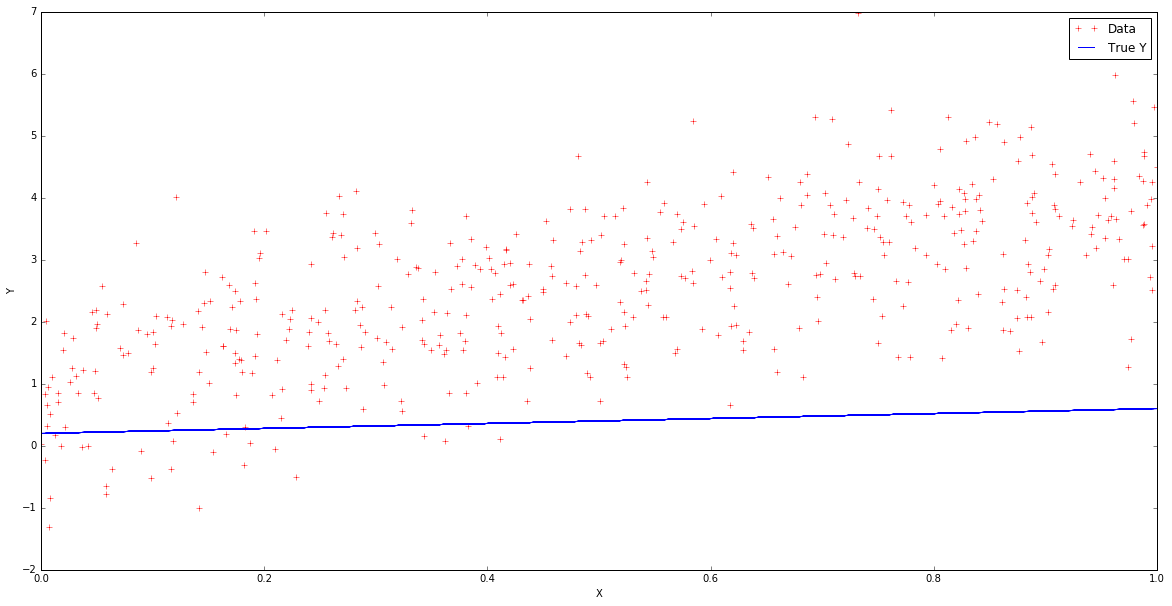

In [119]:
# slope = 0.4, intercept = 0.2

exes = df['x']
whys = df['y']
beta0 = 0.2
beta1 = 0.4

plt.figure(figsize=(20,10))
plt.plot(exes, whys, 'r+', label='Data')
plt.plot(exes, beta0 + beta1*exes, label='True Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

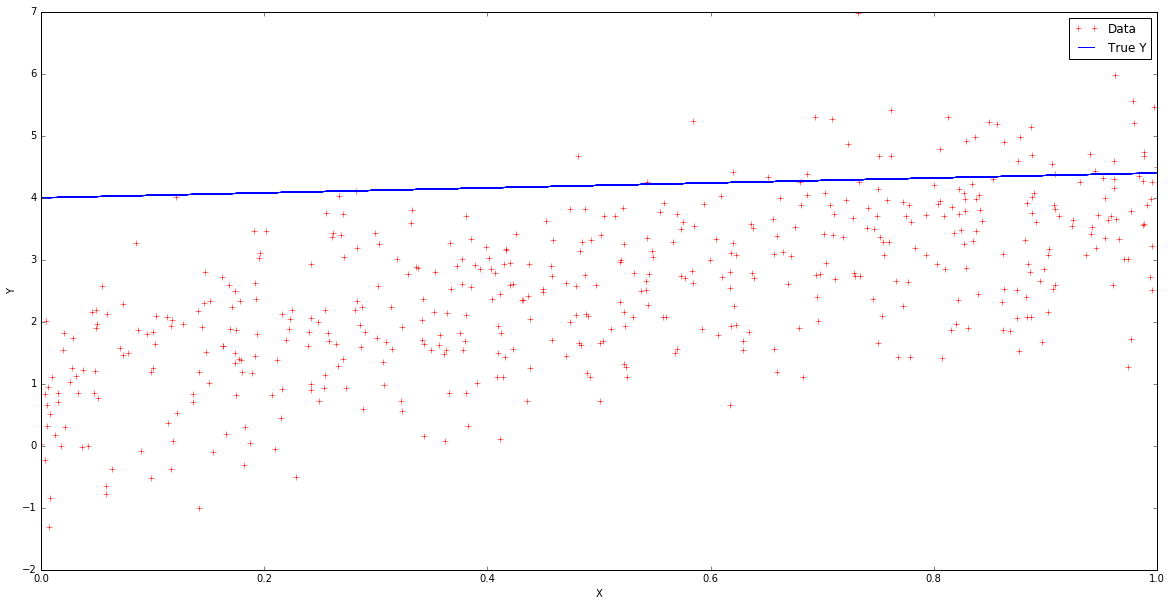

In [116]:
# slope = 0.4, intercept = 4
beta0 = 4
beta1 = 0.4

plt.figure(figsize=(20,10))
plt.plot(exes, whys, 'r+', label='Data')
plt.plot(exes, beta0 + beta1*exes, label='True Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

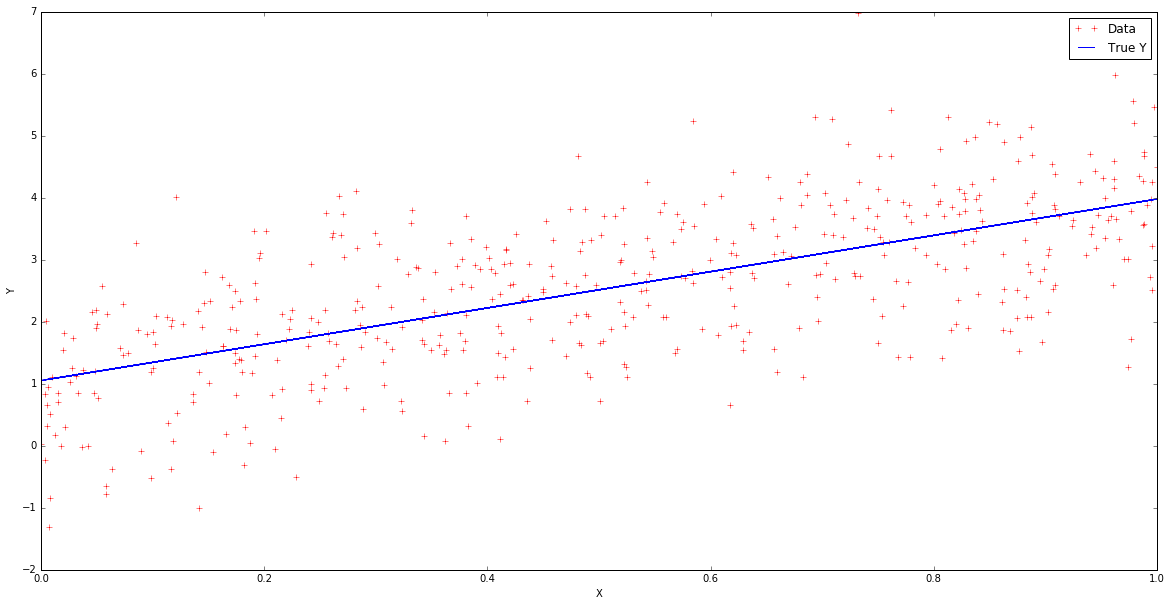

In [117]:
# linear regression model

beta0, beta1 = linear_reg_fit(df)
plt.figure(figsize=(20,10))
plt.plot(exes, whys, 'r+', label='Data')
plt.plot(exes, beta0 + beta1*exes, label='True Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

These plots show that fitting the linear regression with the function I created above gives the best fit for the data. We can see this directly by looking at the plot above. 

### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit of the linear regression model, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

          x         y
0  0.408443  0.292108
1  0.640883  8.941639
2  0.637759  8.081086
3  0.581426  6.263709
4  0.772800  7.879239
                x           y
count  500.000000  500.000000
mean     0.513579    3.621770
std      0.289688    4.438323
min      0.000991   -4.006826
25%      0.271632   -0.676758
50%      0.518060    5.699432
75%      0.756500    7.782619
max      0.999516   11.128164


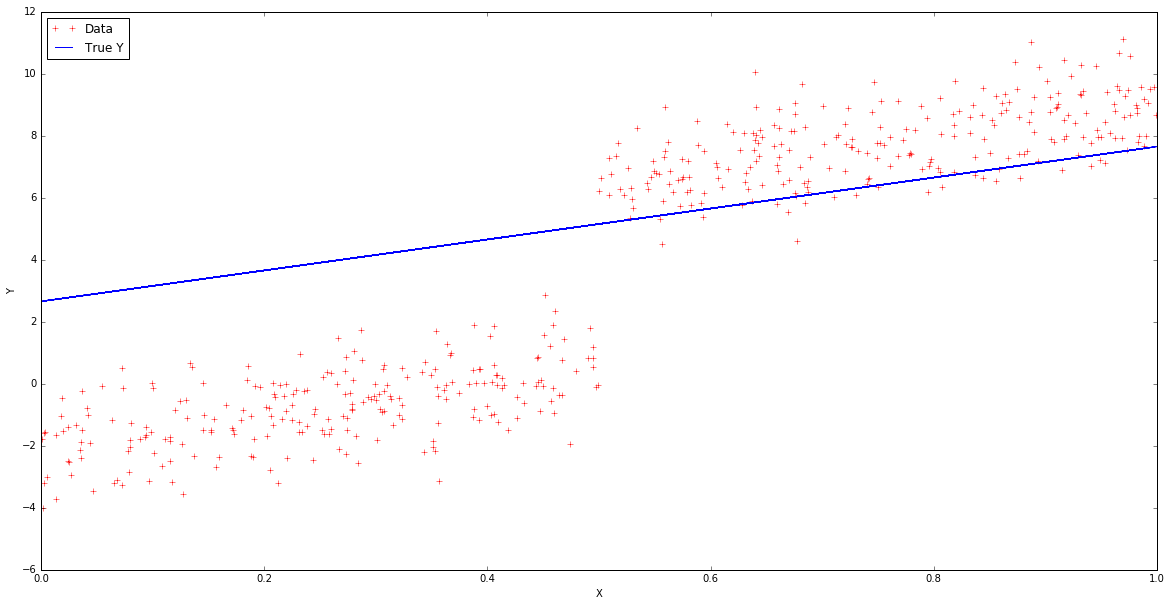

In [130]:
df2 = pd.read_csv('dataset_2_full.txt')
print df2.head()
print df2.describe()

exes = df2['x']
whys = df2['y']
beta0, beta1 = linear_reg_fit(df3)
plt.figure(figsize=(20,10))
plt.plot(exes, whys, 'r+', label='Data')
plt.plot(exes, beta0 + beta1*exes, label='True Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

          x          y
0  0.121384  -3.568853
1  0.160069   5.373957
2  0.004706  -4.441018
3  0.571459  10.261394
4  0.259522  -3.862360
                x           y
count  500.000000  500.000000
mean     0.479318    5.051820
std      0.282849    5.059104
min      0.000326   -6.157849
25%      0.224343   -0.384493
50%      0.492688    7.212020
75%      0.711343    9.069379
max      0.997225   14.127066


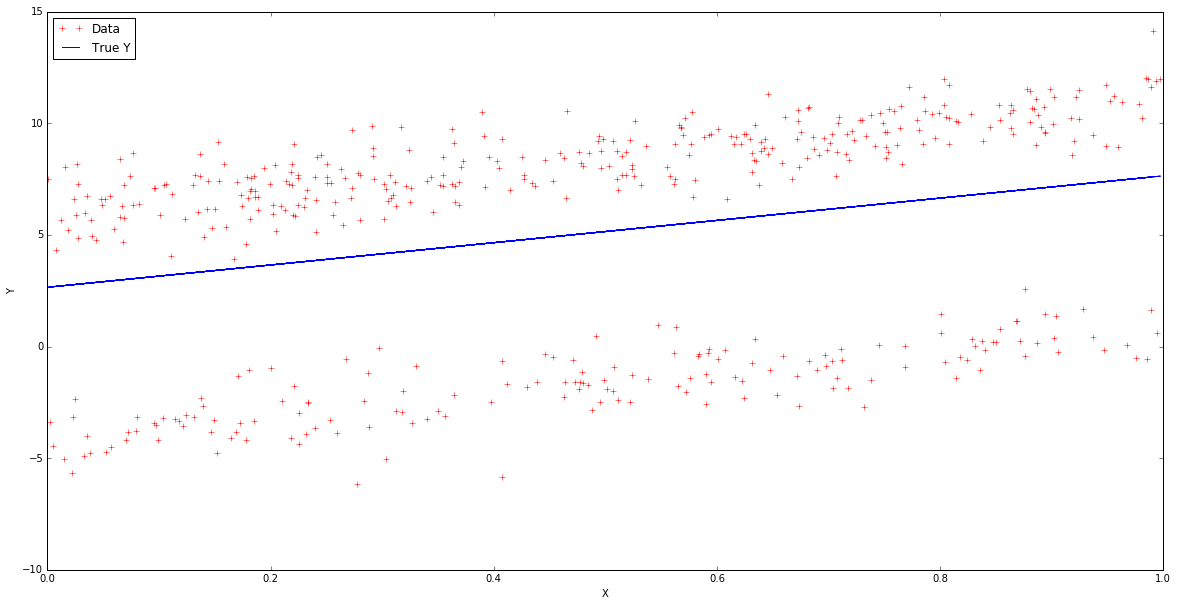

In [131]:
df3 = pd.read_csv('dataset_3_full.txt')
print df3.head()
print df3.describe()

exes = df3['x']
whys = df3['y']
beta0, beta1 = linear_reg_fit(df3)
plt.figure(figsize=(20,10))
plt.plot(exes, whys, 'r+', label='Data')
plt.plot(exes, beta0 + beta1*exes, label='True Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

          x        y
0  0.016353  0.91325
1  0.727570  0.36886
2  0.627700  0.14077
3  0.832000  0.24985
4  0.163920  1.22470
                x           y
count  100.000000  100.000000
mean     0.513204    0.568006
std      0.284072    0.351523
min      0.012743   -0.008473
25%      0.243108    0.265535
50%      0.544070    0.499515
75%      0.725290    0.883310
max      0.982700    1.256900


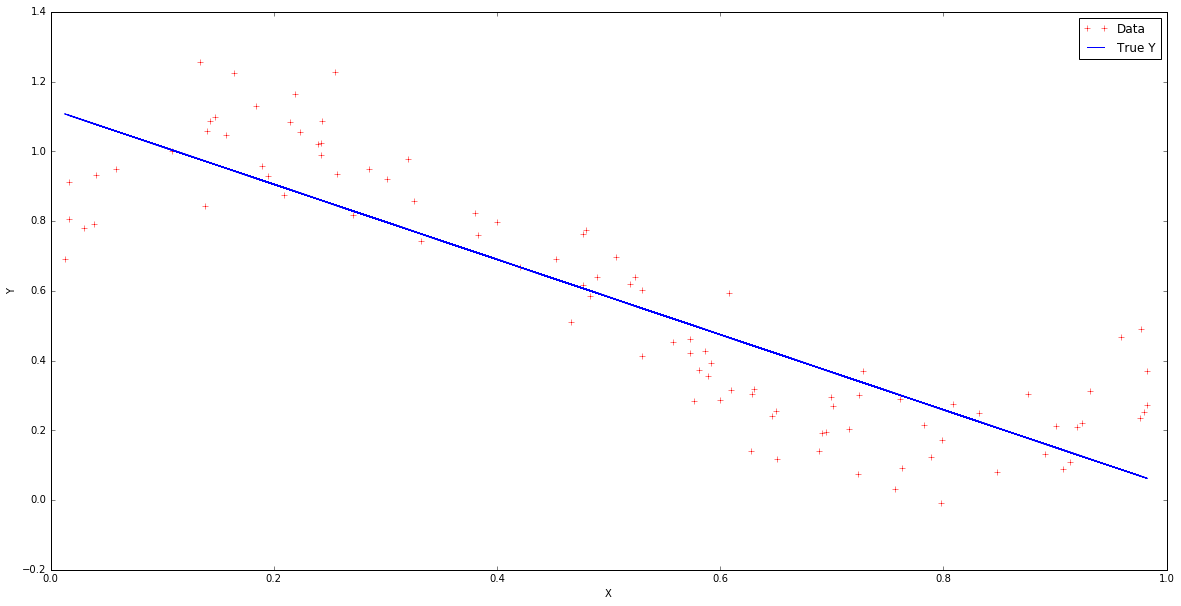

In [132]:
df4 = pd.read_csv('dataset_4_full.txt')
print df4.head()
print df4.describe()

exes = df4['x']
whys = df4['y']
beta0, beta1 = linear_reg_fit(df4)
plt.figure(figsize=(20,10))
plt.plot(exes, whys, 'r+', label='Data')
plt.plot(exes, beta0 + beta1*exes, label='True Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

         x        y
0  0.21376  0.87153
1  0.29810  0.66928
2  0.76834  1.17930
3  0.50115  1.33250
4  0.90946  2.39960
                x           y
count  100.000000  100.000000
mean     0.515216    1.418654
std      0.312062    0.519530
min      0.002122    0.230000
25%      0.187315    1.016450
50%      0.536695    1.375150
75%      0.812442    1.855750
max      0.997040    2.482600


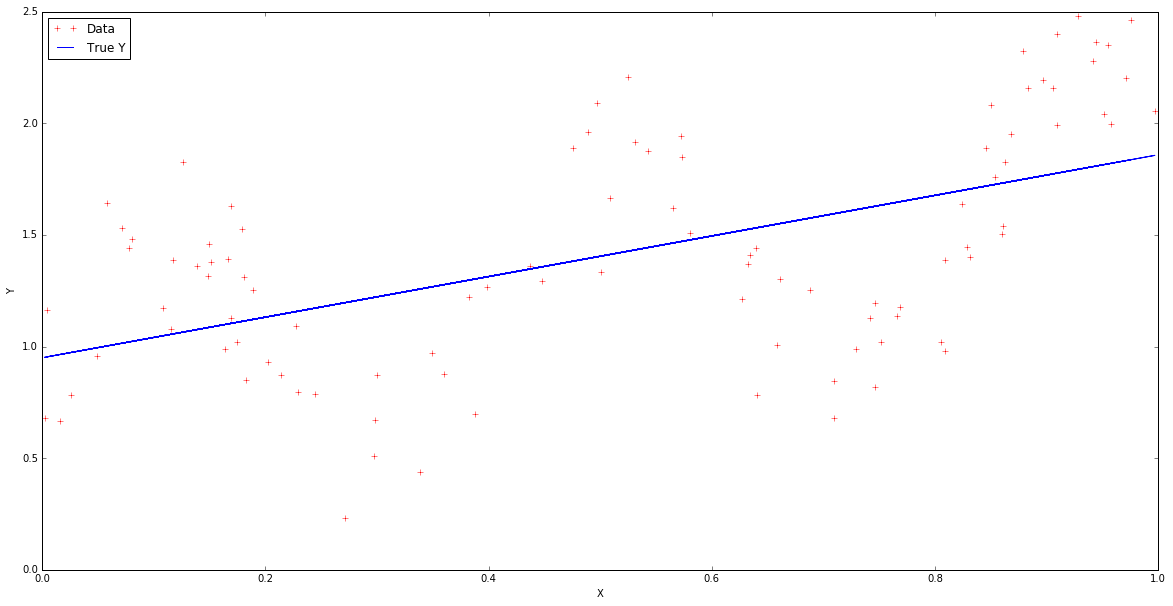

In [133]:
df5 = pd.read_csv('dataset_5_full.txt')
print df5.head()
print df5.describe()

exes = df5['x']
whys = df5['y']
beta0, beta1 = linear_reg_fit(df5)
plt.figure(figsize=(20,10))
plt.plot(exes, whys, 'r+', label='Data')
plt.plot(exes, beta0 + beta1*exes, label='True Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

          x         y
0  0.665138  2.222823
1  0.008478  1.084748
2  0.832568  4.798851
3  0.168644  2.147488
4  0.652890  5.440666
                x           y
count  500.000000  500.000000
mean     0.505893    3.475406
std      0.278413    2.204698
min      0.002750   -3.256152
25%      0.285743    1.708265
50%      0.509941    3.082882
75%      0.746644    4.804284
max      0.998352   13.237166


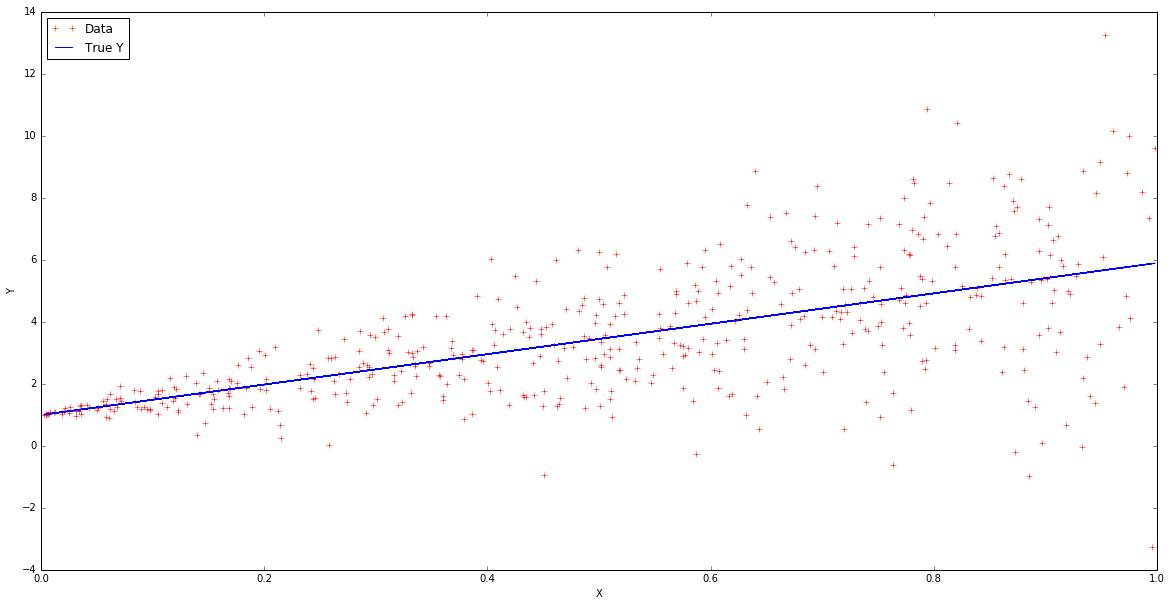

In [134]:
df6 = pd.read_csv('dataset_6_full.txt')
print df6.head()
print df6.describe()

exes = df6['x']
whys = df6['y']
beta0, beta1 = linear_reg_fit(df6)
plt.figure(figsize=(20,10))
plt.plot(exes, whys, 'r+', label='Data')
plt.plot(exes, beta0 + beta1*exes, label='True Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')

## Challenge Problem: Combining Random Variables

This problem, we explore the distirbution of random variables that result from combining other random variables.

### Part (a): Adding Two Uniformly Distributed Variables

Consider the independent random variables $X\sim U(0, 1)$ and $Y\sim U(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

** Solution : ** 
A continuous random variable X has a uniform distribution U(a,b) if its probability density function is f(x) = 1/(b-a). Therefore, as should be expected, the aread under the f(x) curve and between the endpoints is 1. This makes f(x) a valid probability density function. Since X and Y are independent random variables, to get the distribution for Z, we multiply the distribution functions for X and Y. This follows the rule of independence in calculating probabilities. We get 1, which also proves that this is a valid pdf for Z. 

f(x) = [1/(1-0)] * [1/(1-0)] = 1 


### Part (b): Adding Multiple Uniformly Distributed Variables

Consider three independent random variables $X_1, X_2, X_3 \sim U(0, 1)$. Let $Z$ be the random variable $Z = X_1 + X_2 + X_3$. 

What is the distribution of $Z$? What if you add 10 or 12 independent (standard) uniformly distributed variables? Conjecture on the distribution of 
$$
Z = \lim_{n\to \infty} \sum_{i=1}^n X_i
$$
where $\left\{X_i \right\}$ are independent (standard) uniformly distributed variables.

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

** Solution : ** 
This question is similar to the one above. Once again, since X1, X2, and X3 are independent random variables, their probabilities should be multiplied to one another to determine the distribution of Z, the sum of the 3. This makes sense becuase each random variable is independent of the other 2 and therefore, Z is made up of 3 independent variables that will not affect one another. The distribution of Z here is once again equal to 1. If you add 10 or even 12 independent uniformly distributed variables, the answer will still be the same. As long as the variables are independent of one another, we can multiply their distributions to find the overall distribution of Z. 

### Part (c): Combining Normally Distributed Variables

Consider the independent random variables $X\sim \mathcal{N}(0, 1)$ and $Y\sim \mathcal{N}(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** use properties of expected value and some experimentation.

**Solution: **
The same idea of independence is true in this question. The probabilities will be multiplied together for X and Y to get the distribution of Z. In this case, however, the probability density function for a normally distributed random variable is equal to : f(x) = [1/sqrt(2pi*sigma)]*exp(-(x-u)^2/2sigma^2). The expected value for a normal random variable with a mean of 0 and variance of 1 is 0. Therefore, the mean or expected value for Z will also be 0. This makes sense because the random variables center around zero and are still independent of one another. Also, following with the rules for independence, for any 2 independent random variables, the expected value will still be 0. 

### Part (d): Product of Normally Distributed Variables

Is the product of two normally distributed variables a normally distributed variable? You should fully explain and support your conlusion. 

**Solution:**
No, the product of 2 normally distributed variables is not a normally distributed variable. This is due to the fact that the normally distributed variables may be centered around different values and therefore, the resulting product may not be normally distributed but may display a bimodal trend. The pdf of a normally distributed random variable is quite complicated and the product of 2 will be more complicated. 

---